## Libraries

In [12]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

# Bayes' Rule

Bayes' Rule, named after the Reverend Thomas Bayes, is a fundamental theorem in probability theory. It describes how to update the probabilities of hypotheses when given evidence. Bayes' Rule is expressed mathematically as:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

where:

- $P(A|B)$ is the posterior probability: the probability of hypothesis \( A \) given the evidence \( B \).
- $P(B|A)$ is the likelihood: the probability of evidence \( B \) given that hypothesis \( A \) is true.
- $P(A)$ is the prior probability: the initial probability of hypothesis \( A \) before seeing the evidence \( B \).
- $P(B)$ is the marginal likelihood: the total probability of the evidence \( B \) under all possible hypotheses.

### Explanation

- **Prior Probability ($P(A)$)**: This represents our initial belief about the probability of the hypothesis $A$ before considering any new evidence.
  
- **Likelihood ($P(B|A)$)**: This represents the probability of observing the evidence $B$ assuming that the hypothesis $A$ is true.
  
- **Posterior Probability ($P(A|B)$)**: This is the updated probability of the hypothesis $A$ after taking the new evidence $B$ into account.

- **Marginal Likelihood ($P(B)$)**: This is the probability of observing the evidence $B$ under all possible hypotheses. It can be calculated as:
  
  $$
  P(B) = \sum_{i} P(B|A_i) \cdot P(A_i)
  $$

  where $A_i$ represents all possible hypotheses.

Based on the theory above, let's see a practical use of Bayes' theorem from the reference: https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html

> A person has a cough and flu-like symptoms, and gets a PCR test for COVID-19, which comes back positive. What is the likelihood that they actually have COVID-19, as opposed to a regular cold or flu? 

*We can use Bayes’ theorem to compute this!* 

> Let’s say that the local rate of symptomatic individuals who actually are infected with COVID-19 is 7.4% (as reported on July 10, 2020 for San Francisco); thus, our prior probability that someone with symptoms actually has COVID-19 is .074. 

>The RT-PCR test used to identify COVID-19 RNA is highly specific (that is, it very rarelly reports the presence of the virus when it is not present); for our example, we will say that the specificity is 99%. Its sensitivity is not known, but probably is no higher than 90%.

First let’s look at the probability of disease given a single positive test. We know that the specificity is 99% 

$$sp = specificity = 0.99$$

And that the sensitivity is 

$$sen = sensitivity > 0.90$$

Then, based on previous data we can stablish a prior belief that someone with symptons actually has COVID-19 is 

$$prior = 0.074$$

In [9]:
sen = 0.90 # sensitivity - let's guess a number for sensitivity
sp = 0.99 # specificity
prior = 0.074 # prior probability that someone with symptoms actually has COVID-19

Thus, 

$$
P(\text{disease present} \mid \text{test is positive}) = \frac{P(\text{test is positive} \mid \text{disease present}) P(\text{disease present})}{P(\text{test is positive})}
$$

where,

$$
P(\text{test is positive}) = P(\text{test is positive} \mid \text{disease present})P(\text{disease present}) + \\
P(\text{test is positive} \mid \text{disease NOT present})P(\text{disease NOT present})
$$

Then, we can call such variables with the following names:

- prior = $P(\text{disease present})$

- posterior = $P(\text{disease present} \mid \text{test is positive})$

In [10]:
p_disease_present = prior # based on our prior analysis of the data
p_disease_NOT_present = 1 - prior

# sensitivity give us how sensitive to the virus is the test
# specificity give us probability of being wrong
p_test_is_positive = sen * p_disease_present + (1 - sp) * p_disease_NOT_present

In [11]:
p_diseas_present_test_is_positive = (sen * p_disease_present) / p_test_is_positive
print(
    f"The probability of the disease is present given that the test is positive is {p_diseas_present_test_is_positive*100}%"
)

The probability of the disease is present given that the test is positive is 87.79330345373056%


> The high specificity of the test, along with the relatively high base rate of the disease, means that most people who test positive actually have the disease. Now let’s plot the posterior as a function of the prior. Let’s first create a function to compute the posterior, and then apply this with a range of values for the prior.

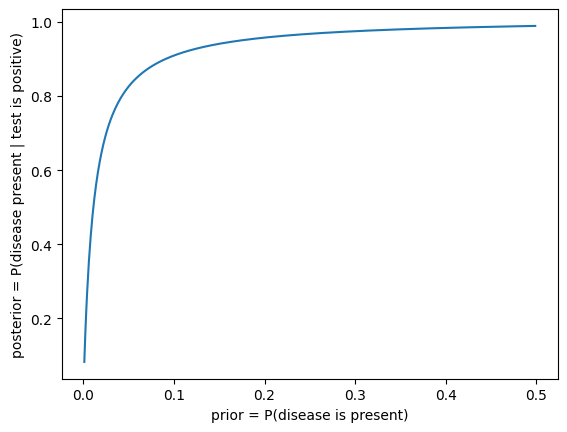

In [15]:
def compute_posterior(prior, sensitivity, specificity):
    likelihood = sensitivity  # p(test|disease present) 
    marginal_likelihood = sensitivity * prior + (1 - specificity) * (1 - prior)
    posterior = (likelihood * prior) / marginal_likelihood
    return(posterior)


prior_values = np.arange(0.001, 0.5, 0.001)
posterior_values = compute_posterior(prior_values, sen, sp)

plt.plot(prior_values, posterior_values)
plt.xlabel('prior = P(disease is present)')
_ = plt.ylabel('posterior = P(disease present | test is positive)')

> This figure highlights a very important general point about diagnostic testing: Even when the test has high specificity, if a condition is rare then most positive test results will be false positives.